In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [3]:
#creating a dataframe 
shoppingTrends = spark.read.format('csv').option('header','true').load('shopping_trends.csv')
shoppingTrends.createOrReplaceTempView('shop_trends')
shoppingTrends.show()

+-----------+---+------+--------------+-----------+---------------------+-------------+----+---------+------+-------------+-------------------+--------------+--------------+----------------+---------------+------------------+------------------------+----------------------+
|Customer ID|Age|Gender|Item Purchased|   Category|Purchase Amount (USD)|     Location|Size|    Color|Season|Review Rating|Subscription Status|Payment Method| Shipping Type|Discount Applied|Promo Code Used|Previous Purchases|Preferred Payment Method|Frequency of Purchases|
+-----------+---+------+--------------+-----------+---------------------+-------------+----+---------+------+-------------+-------------------+--------------+--------------+----------------+---------------+------------------+------------------------+----------------------+
|          1| 55|  Male|        Blouse|   Clothing|                   53|     Kentucky|   L|     Gray|Winter|          3.1|                Yes|   Credit Card|       Express|     

In [4]:
#Goal 1: Visualize the distribution of sales across different product categories
sales_by_category = spark.sql("""
    SELECT Category, SUM(`Purchase Amount (USD)`) as Total_Sales
    FROM shop_trends
    GROUP BY Category
""")
sales_by_category.show()


+-----------+-----------+
|   Category|Total_Sales|
+-----------+-----------+
|  Outerwear|    18524.0|
|   Clothing|   104264.0|
|   Footwear|    36093.0|
|Accessories|    74200.0|
+-----------+-----------+



In [7]:
#Goal 2: Explore how customer purchases vary across seasons
seasonal_purchases = spark.sql("""
    SELECT Season, SUM(`Purchase Amount (USD)`) as Total_Purchases
    FROM shop_trends
    GROUP BY Season
""")
seasonal_purchases.show()


+------+---------------+
|Season|Total_Purchases|
+------+---------------+
|Spring|        58679.0|
|Summer|        55777.0|
|  Fall|        60018.0|
|Winter|        58607.0|
+------+---------------+



In [9]:
#Goal 3: Investigate the distribution of purchases across different age groups
age_group_distribution = spark.sql("""
    SELECT Age, COUNT(*) as Purchase_Count
    FROM shop_trends
    GROUP BY Age
""")
age_group_distribution.show()


+---+--------------+
|Age|Purchase_Count|
+---+--------------+
| 51|            72|
| 54|            83|
| 29|            76|
| 69|            88|
| 42|            80|
| 64|            73|
| 30|            71|
| 34|            68|
| 59|            75|
| 22|            66|
| 28|            79|
| 52|            73|
| 35|            72|
| 47|            71|
| 43|            79|
| 31|            79|
| 18|            69|
| 70|            67|
| 27|            83|
| 61|            65|
+---+--------------+
only showing top 20 rows



In [12]:
#Goal 4: Analyze the impact of subscription status on the average purchase amount
subscription_impact = spark.sql("""
    SELECT `Subscription Status`, AVG(`Purchase Amount (USD)`) as Avg_Purchase_Amount
    FROM shop_trends
    GROUP BY `Subscription Status`
""")
subscription_impact.show()


+-------------------+-------------------+
|Subscription Status|Avg_Purchase_Amount|
+-------------------+-------------------+
|                 No| 59.865121180189675|
|                Yes|  59.49192782526116|
+-------------------+-------------------+



In [14]:
#Goal 5: Visualize the distribution of purchases across different locations
location_distribution = spark.sql("""
    SELECT Location, SUM(`Purchase Amount (USD)`) as Total_Sales
    FROM shop_trends
    GROUP BY Location
""")
location_distribution.show()

+-------------+-----------+
|     Location|Total_Sales|
+-------------+-----------+
|         Utah|     4443.0|
|       Hawaii|     3752.0|
|    Minnesota|     4977.0|
|         Ohio|     4649.0|
|       Oregon|     4243.0|
|     Arkansas|     4828.0|
|        Texas|     4712.0|
| North Dakota|     5220.0|
| Pennsylvania|     4926.0|
|  Connecticut|     4226.0|
|      Vermont|     4860.0|
|     Nebraska|     5172.0|
|       Nevada|     5514.0|
|   Washington|     4623.0|
|     Illinois|     5617.0|
|     Oklahoma|     4376.0|
|     Delaware|     4758.0|
|       Alaska|     4867.0|
|   New Mexico|     5014.0|
|West Virginia|     5174.0|
+-------------+-----------+
only showing top 20 rows



In [15]:
#Goal 6: Explore the relationship between customer review ratings and the corresponding purchase amounts
review_rating_analysis = spark.sql("""
    SELECT `Review Rating`, AVG(`Purchase Amount (USD)`) as Avg_Purchase_Amount
    FROM shop_trends
    GROUP BY `Review Rating`
""")
review_rating_analysis.show()

+-------------+-------------------+
|Review Rating|Avg_Purchase_Amount|
+-------------+-------------------+
|          2.6|  59.56603773584906|
|          3.1|  58.77070063694268|
|          4.2| 60.853801169590646|
|            3|  60.72839506172839|
|          2.7|  59.36363636363637|
|          4.4|   60.5253164556962|
|          3.8|  60.87323943661972|
|          2.9| 56.470588235294116|
|          4.5| 59.489208633093526|
|          2.5|  62.28787878787879|
|          4.9|   63.8855421686747|
|          3.4| 59.005494505494504|
|            5|   64.3529411764706|
|          3.3|  59.86184210526316|
|          3.5| 58.833333333333336|
|          4.3| 59.673469387755105|
|          4.8|  61.88194444444444|
|          4.1|  61.95945945945946|
|          4.6|  57.68390804597701|
|          3.6|  57.32214765100671|
+-------------+-------------------+
only showing top 20 rows



In [21]:
#To Check the schema to understand the types of columns
shoppingTrends.printSchema()

#To Convert "Purchase Amount (USD)" to a numeric type 
shoppingTrends = shoppingTrends.withColumn("Purchase Amount (USD)", shoppingTrends["Purchase Amount (USD)"].cast("double"))

#To Check the schema again to confirm the changes
shoppingTrends.printSchema()


root
 |-- Customer ID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Item Purchased: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Purchase Amount (USD): double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Color: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Review Rating: string (nullable = true)
 |-- Subscription Status: string (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Shipping Type: string (nullable = true)
 |-- Discount Applied: string (nullable = true)
 |-- Promo Code Used: string (nullable = true)
 |-- Previous Purchases: string (nullable = true)
 |-- Preferred Payment Method: string (nullable = true)
 |-- Frequency of Purchases: string (nullable = true)

root
 |-- Customer ID: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Item Purchased: stri

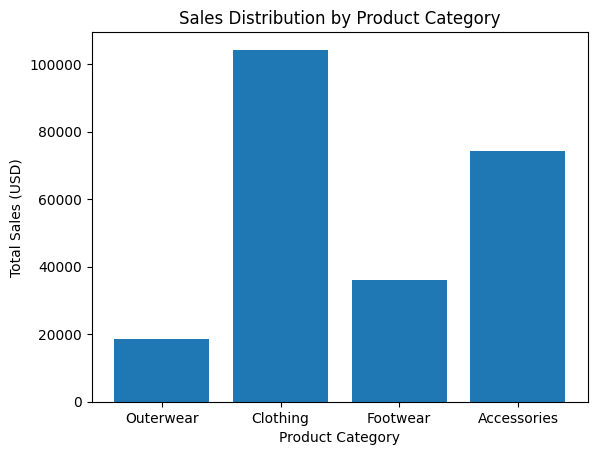

In [20]:
#To plot chart for Goal 1: Visualize the distribution of sales across different product categories
import matplotlib.pyplot as plt

# Creating PySpark DataFrame representing sales distribution by product category
sales_by_category = shoppingTrends.groupBy("Category").sum("Purchase Amount (USD)").withColumnRenamed("sum(Purchase Amount (USD))", "Total_Sales")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
sales_by_category_pd = sales_by_category.toPandas()

# Ploting a bar chart
plt.bar(sales_by_category_pd['Category'], sales_by_category_pd['Total_Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Distribution by Product Category')
plt.show()


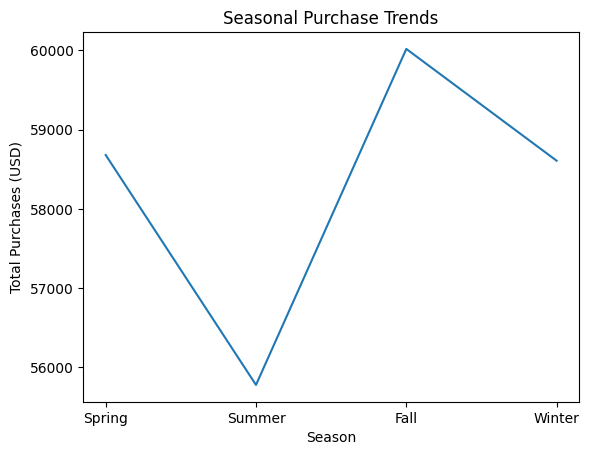

In [27]:
#To plot chart for Goal 2: Explore how customer purchases vary across seasons (Winter, Spring, Summer, Fall) to identify seasonal trends and preferences.
# Creating PySpark DataFrame showing the variation in purchases across different seasons
seasonal_purchases = shoppingTrends.groupBy("Season").sum("Purchase Amount (USD)").withColumnRenamed("sum(Purchase Amount (USD))", "Total_Purchases")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
seasonal_purchases_pd = seasonal_purchases.toPandas()

# Plotting a line chart
plt.plot(seasonal_purchases_pd['Season'], seasonal_purchases_pd['Total_Purchases'])
plt.xlabel('Season')
plt.ylabel('Total Purchases (USD)')
plt.title('Seasonal Purchase Trends')
plt.show()

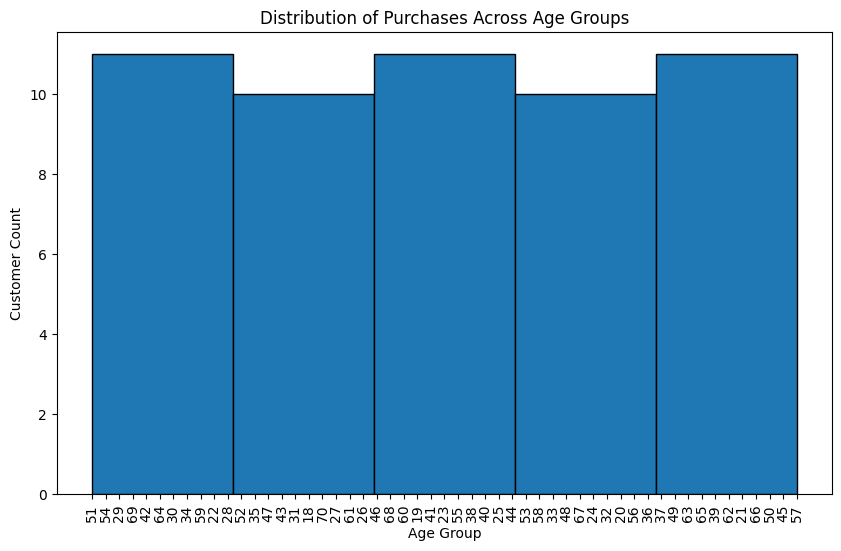

In [34]:
#To plot chart for Goal 3: Investigate the distribution of purchases across different age groups, providing insights into the target audience for specific products.
# Creating age groups in the PySpark DataFrame
age_group_distribution = shoppingTrends.groupBy("Age").count().withColumnRenamed("count", "Purchase_Count")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
age_group_distribution_pd = age_group_distribution.toPandas()

# Plotting a histogram with increased rotation and adjusted figure size
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(age_group_distribution_pd['Age'], bins=5, edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Distribution of Purchases Across Age Groups')
plt.xticks(rotation=90)  # Increase rotation angle to 90 degrees
plt.show()





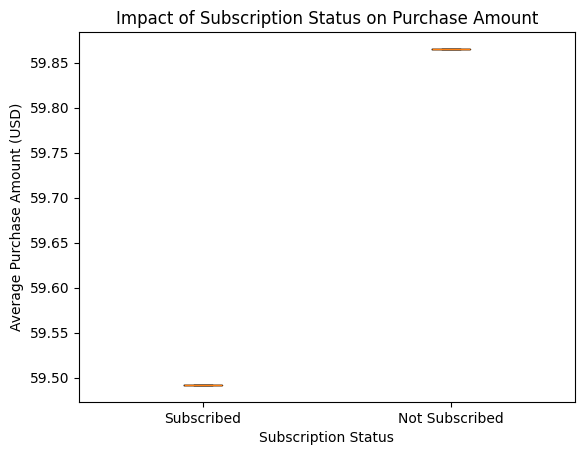

In [37]:
#To plot chart for Goal 4: Analyze the impact of subscription status on the average purchase amount to understand whether subscribed customers tend to spend more.
# Calculating average purchase amounts for subscribed and non-subscribed customers
subscription_impact = shoppingTrends.groupBy("Subscription Status").avg("Purchase Amount (USD)").withColumnRenamed("avg(Purchase Amount (USD))", "Avg_Purchase_Amount")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
subscription_impact_pd = subscription_impact.toPandas()

# Plotting a box plot
plt.boxplot([subscription_impact_pd[subscription_impact_pd['Subscription Status'] == 'Yes']['Avg_Purchase_Amount'],
             subscription_impact_pd[subscription_impact_pd['Subscription Status'] == 'No']['Avg_Purchase_Amount']],
            labels=['Subscribed', 'Not Subscribed'])
plt.xlabel('Subscription Status')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Impact of Subscription Status on Purchase Amount')
plt.show()











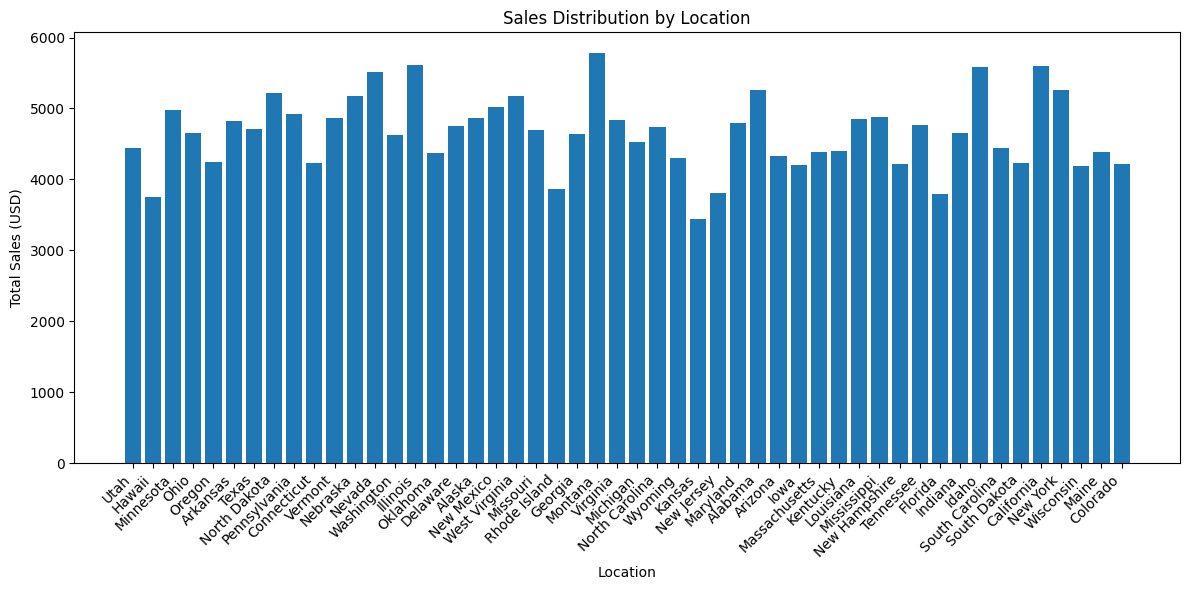

In [41]:
#To plot chart for Goal 5: Visualize the distribution of purchases across different locations to identify geographical preferences and variations in shopping behavior.
# Creating PySpark DataFrame representing sales distribution by location
location_distribution = shoppingTrends.groupBy("Location").sum("Purchase Amount (USD)").withColumnRenamed("sum(Purchase Amount (USD))", "Total_Sales")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
location_distribution_pd = location_distribution.toPandas()

# Plotting a bar chart with rotated x-axis labels and adjusted figure size
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(location_distribution_pd['Location'], location_distribution_pd['Total_Sales'])
plt.xlabel('Location')
plt.ylabel('Total Sales (USD)')
plt.title('Sales Distribution by Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.tight_layout()  # Automatically adjusts subplot parameters for better layout
plt.show()













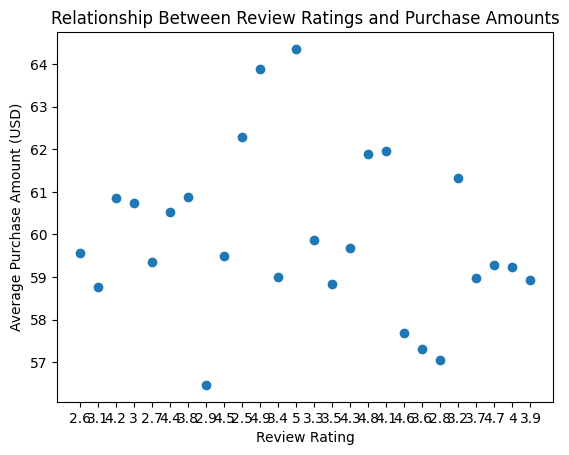

In [42]:
#To plot chart for Goal 6: Explore the relationship between customer review ratings and the corresponding purchase amounts to assess customer satisfaction and its impact on spending.
# Deriving a PySpark DataFrame combining review ratings and purchase amounts
review_rating_analysis = shoppingTrends.groupBy("Review Rating").avg("Purchase Amount (USD)").withColumnRenamed("avg(Purchase Amount (USD))", "Avg_Purchase_Amount")

# Converting PySpark DataFrame to Pandas DataFrame for plotting
review_rating_analysis_pd = review_rating_analysis.toPandas()

# Plotting a scatter plot
plt.scatter(review_rating_analysis_pd['Review Rating'], review_rating_analysis_pd['Avg_Purchase_Amount'])
plt.xlabel('Review Rating')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Relationship Between Review Ratings and Purchase Amounts')
plt.show()
